Text(0.5, 1.0, '5th element')

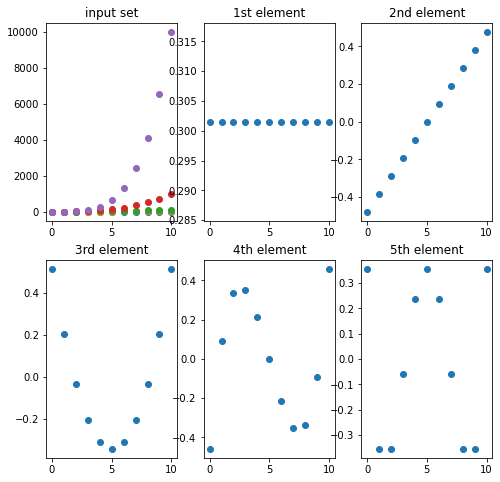

In [18]:
import numpy as np
import math
from matplotlib import pyplot as plt

def dot(i1:np.ndarray,i2:np.ndarray):
    return np.sum(np.multiply(i1,i2))



n0 = np.array([1 for i in range(0,11)])
n1 = np.array([pow(i,1) for i in range(0,11)])
n2 = np.array([pow(i,2) for i in range(0,11)])
n3 = np.array([pow(i,3) for i in range(0,11)])
n4 = np.array([pow(i,4) for i in range(0,11)])

input = [n0,n1,n2,n3,n4]

ortho = input.copy()


ortho[0] = ortho[0]/math.sqrt(dot(ortho[0],ortho[0]))


for i in range(1,5):
    s = np.zeros(11)
    for j in range(0,i):
        s = s + dot(input[i],ortho[j])*ortho[j]
    g = input[i]-s
    ortho[i] = g/math.sqrt(dot(g,g)) 


#plot 
plt.figure(num=1,figsize=(8,8))
plt.subplot(2,3,1)
plt.scatter(range(0,11),n0)
plt.scatter(range(0,11),n1)
plt.scatter(range(0,11),n2)
plt.scatter(range(0,11),n3)
plt.scatter(range(0,11),n4)
plt.title("input set")
plt.subplot(2,3,2)
plt.scatter(range(0,11),ortho[0])
plt.title("1st element")
plt.subplot(2,3,3)
plt.scatter(range(0,11),ortho[1])
plt.title("2nd element")
plt.subplot(2,3,4)
plt.scatter(range(0,11),ortho[2])
plt.title("3rd element")
plt.subplot(2,3,5)
plt.scatter(range(0,11),ortho[3])
plt.title("4th element")
plt.subplot(2,3,6)
plt.scatter(range(0,11),ortho[4])
plt.title("5th element")



L0 =  135661
L1 =  34593555.0
L2 =  93922.0768775904
LI =  255.0
central moment : 
mm20 =  312.1986161873216
mm11 =  0.002601640681335006
mm02 =  312.1986161873216


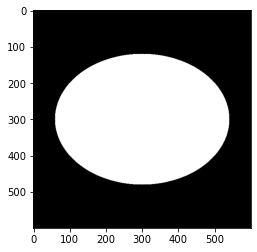

In [5]:
import cv2 
import numpy as np
import math
from matplotlib import pyplot as plt

img = np.zeros((600,600))

for i in range(0,600):
    for j in range(0,600):
        if (pow(i-300,2)/pow(180,2)+pow(j-300,2)/pow(240,2) <= 1):
            img[i][j] = 255

plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.show

L0 = np.count_nonzero(img)
L1 = np.sum(img)
L2 = math.sqrt(np.sum(img**2))
LI = np.max(img)

print("L0 = ", L0)
print("L1 = ", L1)
print("L2 = ", L2)
print("LI = ", LI)

nxx = img.copy()
nyy = img.copy()
for i in range(0,600):
    nxx[i,:] = i*nxx[i,:]
    nyy[:,i] = i*nyy[:,i]

nnx = np.sum(nxx)/np.sum(img)
nny = np.sum(nyy)/np.sum(img)
m20 = img.copy()
m11 = img.copy()
m02 = img.copy()

for i in range(0,600):
    for j in range(0,600):
        m20[i][j] = (i-nnx)**2
        m11[i][j] = (i-nnx)*(j-nny)
        m02[i][j] = (j-nny)**2

print("central moment : ")
print("mm20 = ", np.sum(m20)/np.sum(img))
print("mm11 = ", np.sum(m11)/np.sum(img))
print("mm02 = ", np.sum(m02)/np.sum(img))


<function matplotlib.pyplot.show(close=None, block=None)>

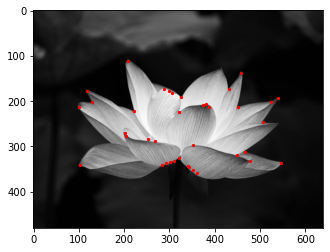

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import scipy.signal

img = cv2.imread('canny.jpg',0)
img = img.astype(np.double)
#window
w = np.zeros((21,21))
w = w.astype(np.double)
for i in range(-10,11):
    for j in range(-10,11):
        w[i+10][j+10] = np.exp(-(i**2+j**2)/(2*7))

X = np.gradient(img)[0]
Y = np.gradient(img)[1]

A = scipy.signal.convolve2d(np.multiply(X,X),w,'same')
B = scipy.signal.convolve2d(np.multiply(Y,Y),w,'same')
C = scipy.signal.convolve2d(np.multiply(X,Y),w,'same')



Tr = A + B
Det = A*B - C**2

R = Det - 0.05*Tr*Tr

sum=0

for i in range(1,R.shape[0]-1):
    for j in range(1,R.shape[1]-1):           
        if (R[i][j] >= R[i+1][j] and R[i][j] >= R[i][j+1] and R[i][j] >= R[i+1][j+1] and R[i][j] >= R[i-1][j] and R[i][j] >= R[i][j-1] and R[i][j] >= R[i-1][j-1] and R[i][j] >= R[i+1][j-1] and R[i][j] >= R[i-1][j+1]):
            if (R[i][j] >= (np.max(R)/100)):
               plt.scatter(j,i,c='red',s=[5])


plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.show